<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estatística-Descritiva" data-toc-modified-id="Estatística-Descritiva-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estatística Descritiva</a></span><ul class="toc-item"><li><span><a href="#Escolha-um-candidato-a-governador-de-qualquer-Estado-e-faça-uma-análise-descritiva-dos-votos" data-toc-modified-id="Escolha-um-candidato-a-governador-de-qualquer-Estado-e-faça-uma-análise-descritiva-dos-votos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Escolha um candidato a governador de qualquer Estado e faça uma análise descritiva dos votos</a></span></li><li><span><a href="#Os-votos-dele-tem-alguma-relação-com-o-votos-de-algum-candidato-a-presidente-do-mesmo-ano?" data-toc-modified-id="Os-votos-dele-tem-alguma-relação-com-o-votos-de-algum-candidato-a-presidente-do-mesmo-ano?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Os votos dele tem alguma relação com o votos de algum candidato a presidente do mesmo ano?</a></span></li></ul></li><li><span><a href="#Análise-de-Público" data-toc-modified-id="Análise-de-Público-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Análise de Público</a></span><ul class="toc-item"><li><span><a href="#Obtenha-os-dados-do-eleitor-daquele-Estado-escolhido-por-você-e-responda:--infira-o-público-do-eleitor-daquele-governador-analisado-na-questão-anterior:" data-toc-modified-id="Obtenha-os-dados-do-eleitor-daquele-Estado-escolhido-por-você-e-responda:--infira-o-público-do-eleitor-daquele-governador-analisado-na-questão-anterior:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Obtenha os dados do eleitor daquele Estado escolhido por você e responda:  infira o público do eleitor daquele governador analisado na questão anterior:</a></span></li></ul></li></ul></div>

**Neocortex** <p>
<b> <font size=+8 style="color:darkblue"> Teste para vaga de cientista pleno </font> <b> <br> 

- Nome do candidato: Yuri Godoi
- Telefone: (31) 98542-5300  
- E-mail: godoiyuri@gmail.com

## Estatística Descritiva

### Escolha um candidato a governador de qualquer Estado e faça uma análise descritiva dos votos 

In [347]:
#IMPORTANDO PACOTES:

import pandas as pd # Pacote para manipulação de dados
import numpy as np # Pacote para manipulação matemática
import matplotlib.pyplot as plt # Pacote gráfico
import matplotlib.ticker as mtick #Pacote gráfico
import seaborn as sns # Pacote gráfico
import folium #Pacote gráfico para mapas interativos
import json #Pacote para leitura de JSON



In [348]:
#CARREGANDO BASES UTILIZADAS PARA A ANALISE:

resultado = pd.read_csv('votacao_secao_2018_MG.csv',delimiter=';',encoding='latin1')
detalhe = pd.read_csv('detalhe_votacao_munzona_2018_MG.csv',delimiter=';',encoding='latin1')
resultado_secao = pd.read_csv('votacao_secao_2018_MG.csv',delimiter=';',encoding='latin1')
coordenadas_mun = pd.read_csv('Coordenadas_Municipios.txt')
coordenadas_estado = pd.read_csv('Coordenadas_Estados.txt')
municipios_tse = pd.read_csv('municipios_brasileiros_tse.csv')
boletim_1 = pd.read_csv('bweb_1t_MG_101020181954.csv',delimiter=';',encoding='latin1')

### **Foi escolhido para análise Romeu Zema Neto, candidato ao Governo de Minas Gerais nas eleições de 2018** 

In [160]:
df = resultado[['NR_TURNO','CD_CARGO','DS_CARGO','NR_VOTAVEL','NM_VOTAVEL','QT_VOTOS']] #Data Frame com variáveis utilizadas nas análises
df.head()

NR_TURNO  CD_CARGO    DS_CARGO  NR_VOTAVEL  \
0         1         3  Governador          45   
1         1         3  Governador          70   
2         1         3  Governador          13   
3         1         3  Governador          16   
4         1         3  Governador          30   

                        NM_VOTAVEL  QT_VOTOS  
0  ANTONIO AUGUSTO JUNHO ANASTASIA        70  
1                  CLAUDINEY ALVES         2  
2         FERNANDO DAMATA PIMENTEL        18  
3      JORDANO CARVALHO DOS SANTOS         1  
4                  ROMEU ZEMA NETO        81

In [349]:
soma_votos = df.groupby(['NM_VOTAVEL','NR_TURNO','CD_CARGO']).QT_VOTOS.sum().reset_index() #Soma total de votos por candidato
df_g1 = soma_votos.query('NR_TURNO==1 & CD_CARGO==3') # Criação Data Frame total votos para o primeiro turno
df_g1['PCT_VOTOS'] = (df_g1['QT_VOTOS']/df_g1['QT_VOTOS'].sum()).round(4) #Parcela de votação para cada voto possível
df_g1 = df_g1.sort_values('QT_VOTOS') #Ordenando do candidato mais votado ao menos votado
df_g1

<ipython-input-349-f52cfcabf448>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g1['PCT_VOTOS'] = (df_g1['QT_VOTOS']/df_g1['QT_VOTOS'].sum()).round(4) #Parcela de votação para cada voto possível


NM_VOTAVEL  NR_TURNO  CD_CARGO  QT_VOTOS  PCT_VOTOS
81          ALEXANDRE FLACH DOMINGUES         1         3      4088     0.0003
1028      JORDANO CARVALHO DOS SANTOS         1         3     15742     0.0013
362                   CLAUDINEY ALVES         1         3     18330     0.0015
1147      JOÃO BATISTA DOS MARES GUIA         1         3     56856     0.0047
1482   MARIA DIRLENE TRINDADE MARQUES         1         3    133986     0.0110
4            ADALCLEVER RIBEIRO LOPES         1         3    268683     0.0220
2163                      VOTO BRANCO         1         3    797534     0.0653
2168                        VOTO NULO         1         3   1722385     0.1410
710          FERNANDO DAMATA PIMENTEL         1         3   2239979     0.1834
179   ANTONIO AUGUSTO JUNHO ANASTASIA         1         3   2814704     0.2305
1931                  ROMEU ZEMA NETO         1         3   4138967     0.3389

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-350-d4cfcbe574ad>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


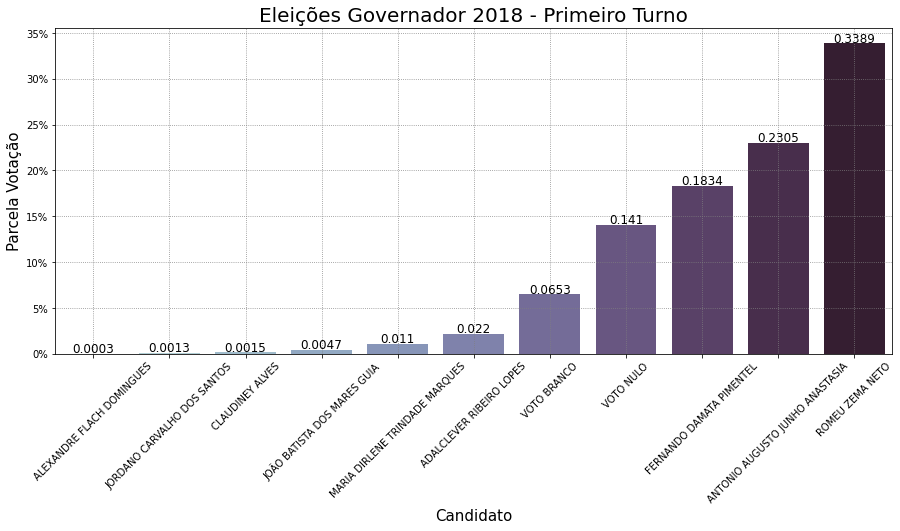

In [350]:
plt.figure(figsize=(15,6))
plot = sns.barplot(df_g1.NM_VOTAVEL,df_g1.PCT_VOTOS,palette="ch:s=.7,rot=-.5")
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width()/2,i.get_height()),
    ha='center',va='baseline',fontsize=12,color='black',xytext=(0,1),textcoords='offset points')
plt.xticks(rotation=45)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.xlabel('Candidato',fontsize=15)
plt.ylabel('Parcela Votação',fontsize=15)
plt.title('Eleições Governador 2018 - Primeiro Turno',fontsize=20)
plt.grid(color='grey',linestyle='dotted')
plt.show()

In [352]:
df_g2 = soma_votos.query('NR_TURNO==2 & CD_CARGO==3') # Criação Data Frame total votos para o segundo turno
df_g2['PCT_VOTOS'] = (df_g2['QT_VOTOS']/df_g2['QT_VOTOS'].sum()).round(4) #Parcela de votação para cada voto possível
df_g2 = df_g2.sort_values('QT_VOTOS') #Ordenando do candidato mais votado ao menos votado
df_g2

<ipython-input-352-64df6dbf8849>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g2['PCT_VOTOS'] = (df_g2['QT_VOTOS']/df_g2['QT_VOTOS'].sum()).round(4) #Parcela de votação para cada voto possível


NM_VOTAVEL  NR_TURNO  CD_CARGO  QT_VOTOS  PCT_VOTOS
2167                      VOTO BRANCO         2         3    476476     0.0395
2172                        VOTO NULO         2         3   1889549     0.1566
180   ANTONIO AUGUSTO JUNHO ANASTASIA         2         3   2734452     0.2267
1932                  ROMEU ZEMA NETO         2         3   6963806     0.5772

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-476-6570d6a428e8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


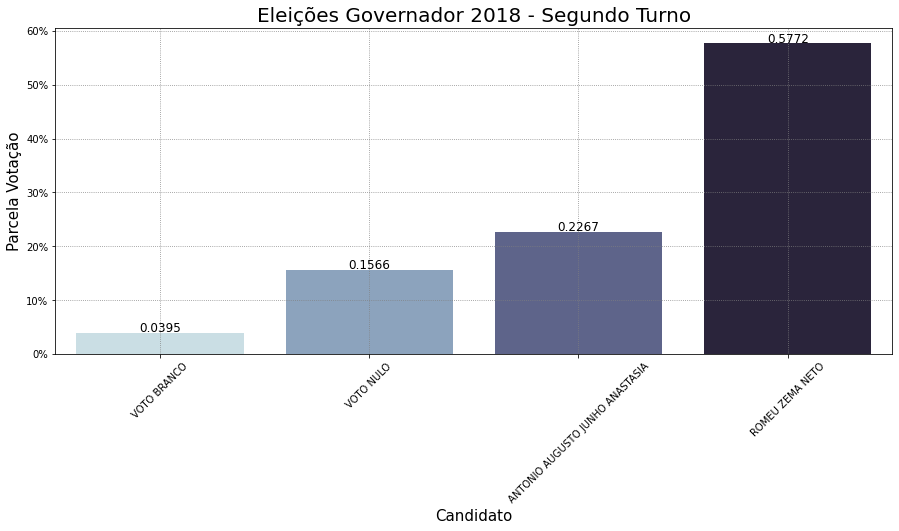

In [476]:
plt.figure(figsize=(15,6))
plot = sns.barplot(df_g2.NM_VOTAVEL,df_g2.PCT_VOTOS,palette="ch:s=.20,rot=-.25")
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width()/2,i.get_height()),
    ha='center',va='baseline',fontsize=12,color='black',xytext=(0,1),textcoords='offset points')
plt.xticks(rotation=45)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.xlabel('Candidato',fontsize=15)
plt.ylabel('Parcela Votação',fontsize=15)
plt.title('Eleições Governador 2018 - Segundo Turno',fontsize=20)
plt.grid(color='grey',linestyle='dotted')
plt.show()

In [354]:
coord = coordenadas_mun[['codigo_ibge','latitude','longitude']] #Data Frame que possui as longitutes de latitudes
mun_tse = municipios_tse.query('uf=="MG"')[['codigo_tse','codigo_ibge']] #Inclusão de codigo IBGE na base de municipios do TSE
resultado_secao = resultado_secao.merge(mun_tse, left_on='CD_MUNICIPIO',right_on='codigo_tse').merge(coord,on='codigo_ibge') #Inclusão das coordenadas de latitude e logintude no Data Frame resultado por seção.

In [530]:
df_governador = resultado_secao.query('CD_CARGO==3 & NR_TURNO==1').groupby(['codigo_ibge','NM_MUNICIPIO','NM_VOTAVEL','NR_VOTAVEL']).QT_VOTOS.sum().reset_index()
df_governador.codigo_ibge = df_governador.codigo_ibge.astype(str)
df_mapa = df_governador.query('NR_VOTAVEL==30').groupby('codigo_ibge').QT_VOTOS.sum()/df_governador.groupby('codigo_ibge').QT_VOTOS.sum()

In [535]:
import branca.colormap as cm

mg_cities = json.load(open("geojs-31-mun.json", encoding="utf-8"))
colormap = cm.LinearColormap(colors=['red','blue'],index=[0.04,0.72],vmin=0,vmax=1)
colormap


In [536]:
mapa = folium.Map(
    width=800, height=600,
    location=[-19.8157, -43.9542], 
    zoom_start=6,
)
folium.GeoJson(mg_cities,
              name='Votos',
              style_function=lambda feature: {
                  'fillColor': colormap(df_mapa[feature['properties']['id']]),
                  'color':'black',
                   'weight':0.3,
              }).add_to(mapa)

colormap.caption = 'Parcela de votos em Romeu Zema'
colormap.add_to(mapa)

mapa

### Os votos dele tem alguma relação com o votos de algum candidato a presidente do mesmo ano?

In [553]:
pres_mg1 = boletim_1[boletim_1.iloc[:,9]=='MG']
filtro_pres = pres_mg1.groupby(['NR_VOTAVEL','NM_VOTAVEL','CD_MUNICIPIO','NM_MUNICIPIO','CD_CARGO_PERGUNTA','DS_CARGO_PERGUNTA']).QT_VOTOS.sum().reset_index()
gov_pres = filtro_pres.query('CD_CARGO_PERGUNTA==1 | CD_CARGO_PERGUNTA==3')
cor_gov_pres = gov_pres.query('NR_VOTAVEL==30 & CD_CARGO_PERGUNTA==3 | CD_CARGO_PERGUNTA==1')


array([1, 3], dtype=int64)

- Para a análise use a aba de resultados do repositório e o ano de 2018 do repositório de dados eleitorais: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1

- Para obter os dados de presidentes em um Estado utilize o Boletim de urna do repositório;

- Do governador, tanto pode ser utilizado o dado do Boletim quanto da votação nominal por município e Zona;

- Analisar apenas os dados do primeiro turno.

- Pode utilizar a IDE que melhor for confortável ou até mesmo o google colab

## Análise de Público

### Obtenha os dados do eleitor daquele Estado escolhido por você e responda:  infira o público do eleitor daquele governador analisado na questão anterior:
    

- Ps: Utilize a aba 'eleitorado' do repositório eleitoral para obter os dados;

In [557]:
perfil = pd.read_csv('perfil_eleitorado_2018.csv',delimiter=';',decimal=',',encoding='latin1')
perfil_secao = pd.read_csv('perfil_eleitor_secao_2018_MG.csv',delimiter=';',decimal=',',encoding='latin1')
perfil_secao

DT_GERACAO HH_GERACAO  ANO_ELEICAO SG_UF  CD_MUNICIPIO  \
0        12/04/2021   14:31:33         2018    MG         41238   
1        12/04/2021   14:31:33         2018    MG         41238   
2        12/04/2021   14:31:33         2018    MG         41238   
3        12/04/2021   14:31:33         2018    MG         41238   
4        12/04/2021   14:31:33         2018    MG         41238   
...             ...        ...          ...   ...           ...   
7252560  12/04/2021   14:31:33         2018    MG         50172   
7252561  12/04/2021   14:31:33         2018    MG         50172   
7252562  12/04/2021   14:31:33         2018    MG         50172   
7252563  12/04/2021   14:31:33         2018    MG         50172   
7252564  12/04/2021   14:31:33         2018    MG         50172   

           NM_MUNICIPIO  CD_MUN_SIT_BIOMETRICA DS_MUN_SIT_BIOMETRICA  NR_ZONA  \
0        BELO HORIZONTE                      2               Híbrido       38   
1        BELO HORIZONTE                      2               Híbrido       38   
2        BELO HORIZONTE                      2               Híbrido       38   
3        BELO HORIZONTE                      2               Híbrido       38   
4        BELO HORIZONTE                      2               Híbrido       38   
...                 ...                    ...                   ...      ...   
7252560       PIRANGUÇU                      0         Sem biometria       51   
7252561       PIRANGUÇU                      0         Sem biometria       51   
7252562       PIRANGUÇU                      0         Sem biometria       51   
7252563       PIRANGUÇU                      0         Sem biometria       51   
7252564       PIRANGUÇU                      0         Sem biometria       51   

         NR_SECAO  ...  CD_ESTADO_CIVIL  DS_ESTADO_CIVIL CD_FAIXA_ETARIA  \
0              57  ...                3           CASADO            5054   
1              57  ...                3           CASADO            6569   
2              57  ...                5            VIÚVO            8084   
3              57  ...                1         SOLTEIRO            2000   
4              57  ...                1         SOLTEIRO            3539   
...           ...  ...              ...              ...             ...   
7252560        72  ...                3           CASADO            7074   
7252561        72  ...                1         SOLTEIRO            3539   
7252562        72  ...                3           CASADO            3034   
7252563        72  ...                3           CASADO            4044   
7252564        72  ...                3           CASADO            4549   

                        DS_FAIXA_ETARIA CD_GRAU_ESCOLARIDADE  \
0        50 a 54 anos                                      6   
1        65 a 69 anos                                      4   
2        80 a 84 anos                                      3   
3        20 anos                                           7   
4        35 a 39 anos                                      6   
...                                 ...                  ...   
7252560  70 a 74 anos                                      8   
7252561  35 a 39 anos                                      7   
7252562  30 a 34 anos                                      5   
7252563  40 a 44 anos                                      8   
7252564  45 a 49 anos                                      6   

                  DS_GRAU_ESCOLARIDADE QT_ELEITORES_PERFIL  \
0                ENSINO MÉDIO COMPLETO                   1   
1          ENSINO FUNDAMENTAL COMPLETO                   1   
2        ENSINO FUNDAMENTAL INCOMPLETO                   1   
3                  SUPERIOR INCOMPLETO                   1   
4                ENSINO MÉDIO COMPLETO                   4   
...                                ...                 ...   
7252560              SUPERIOR COMPLETO                   1   
7252561            SUPERIOR INCOMPLETO               

Critérios para avaliação:

**Pontos possíveis**
    
- Coleta dos dados:	1,5;
- Tratamento dos dados e organização do código:	2;
- Modelagem: 	0,5;
- Linha de raciocínio para resolver um problema: 	3;
- Coesão analítica e Storytelling:	1 (não é necessário escrever um texto, apenas um ou outro bullet curto que explique o raciocício adotado é o esperado neste item);
- Vizualização de dados:  	2;

    
    
**Cada um dos itens são mutiplicados pelos seguintes pesos**
    
- Pergunta 1: 70% do peso;

- Pergunta 2: 30% do peso;

após a média ponderada é obtida uma pontuação final entre 0 e 10;
 
 
 **Dica 1: excesso de gráficos não é uma vantagem, o uso do bom senso apenas sobre o que é relevante para o objetivo proposto**
  **Dica 2: organização conta, precisaremos entender seu código, mas o foco desse teste é analítico**


- O teste pode ser feito com consulta e o notebook com os códigos pode ser entregue até quinta-feira (27/01/2022 até às 18h00) para o email wagner.vargas@ncdx.one. Também pode ser enviado por e-mail um endereço de algum repositório do github criado por você com o notebook.